<a href="https://colab.research.google.com/github/Rajat-Singh-Chouhan/oil-well-log/blob/main/oil_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ds=pd.read_csv("/content/gas_oil.csv")

In [ ]:
ds.head()

,gamma ray,density,neutron,resistivity,target
0,73.59512,2.58541,0.37612,1.97022,no oil
1,73.97836,2.55129,0.41289,1.08789,no oil
2,72.04334,2.57068,0.38331,1.35374,no oil
3,72.76338,2.60603,0.37881,1.47283,no oil
4,66.89448,2.59872,0.39401,1.69231,no oil


In [ ]:
ds_no_oil=ds.loc[ds["target"]=="no oil"]
ds_gas=ds.loc[ds["target"]=="gas"]
ds_oil=ds.loc[ds["target"]=="oil"]


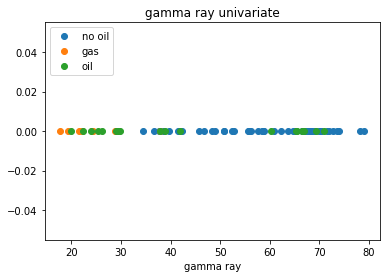

In [ ]:
plt.plot(ds_no_oil["gamma ray"],np.zeros_like(ds_no_oil["gamma ray"]),"o")
plt.plot(ds_gas["gamma ray"],np.zeros_like(ds_gas["gamma ray"]),"o")
plt.plot(ds_oil["gamma ray"],np.zeros_like(ds_oil["gamma ray"]),"o")
plt.title("gamma ray univariate")
plt.xlabel("gamma ray")
plt.legend(['no oil', 'gas','oil'], loc='upper left')

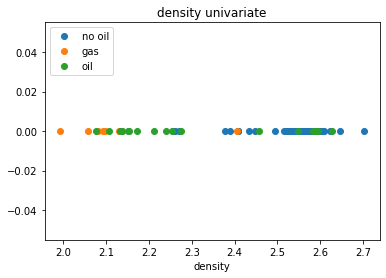

In [ ]:
plt.plot(ds_no_oil["density"],np.zeros_like(ds_no_oil["density"]),"o")
plt.plot(ds_gas["density"],np.zeros_like(ds_gas["density"]),"o")
plt.plot(ds_oil["density"],np.zeros_like(ds_oil["density"]),"o")
plt.title("density univariate")
plt.xlabel("density")
plt.legend(['no oil', 'gas','oil'], loc='upper left')

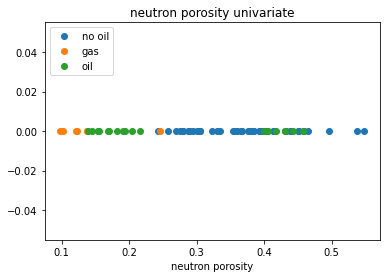

In [ ]:
plt.plot(ds_no_oil["neutron"],np.zeros_like(ds_no_oil["neutron"]),"o")
plt.plot(ds_gas["neutron"],np.zeros_like(ds_gas["neutron"]),"o")
plt.plot(ds_oil["neutron"],np.zeros_like(ds_oil["neutron"]),"o")
plt.title("neutron porosity univariate")
plt.xlabel("neutron porosity")
plt.legend(['no oil', 'gas','oil'], loc='upper left')

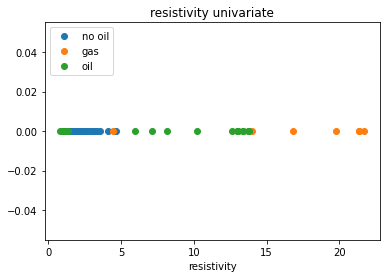

In [ ]:
plt.plot(ds_no_oil["resistivity"],np.zeros_like(ds_no_oil["resistivity"]),"o")
plt.plot(ds_gas["resistivity"],np.zeros_like(ds_gas["resistivity"]),"o")
plt.plot(ds_oil["resistivity"],np.zeros_like(ds_oil["resistivity"]),"o")
plt.title("resistivity univariate")
plt.xlabel("resistivity")
plt.legend(['no oil', 'gas','oil'], loc='upper left')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


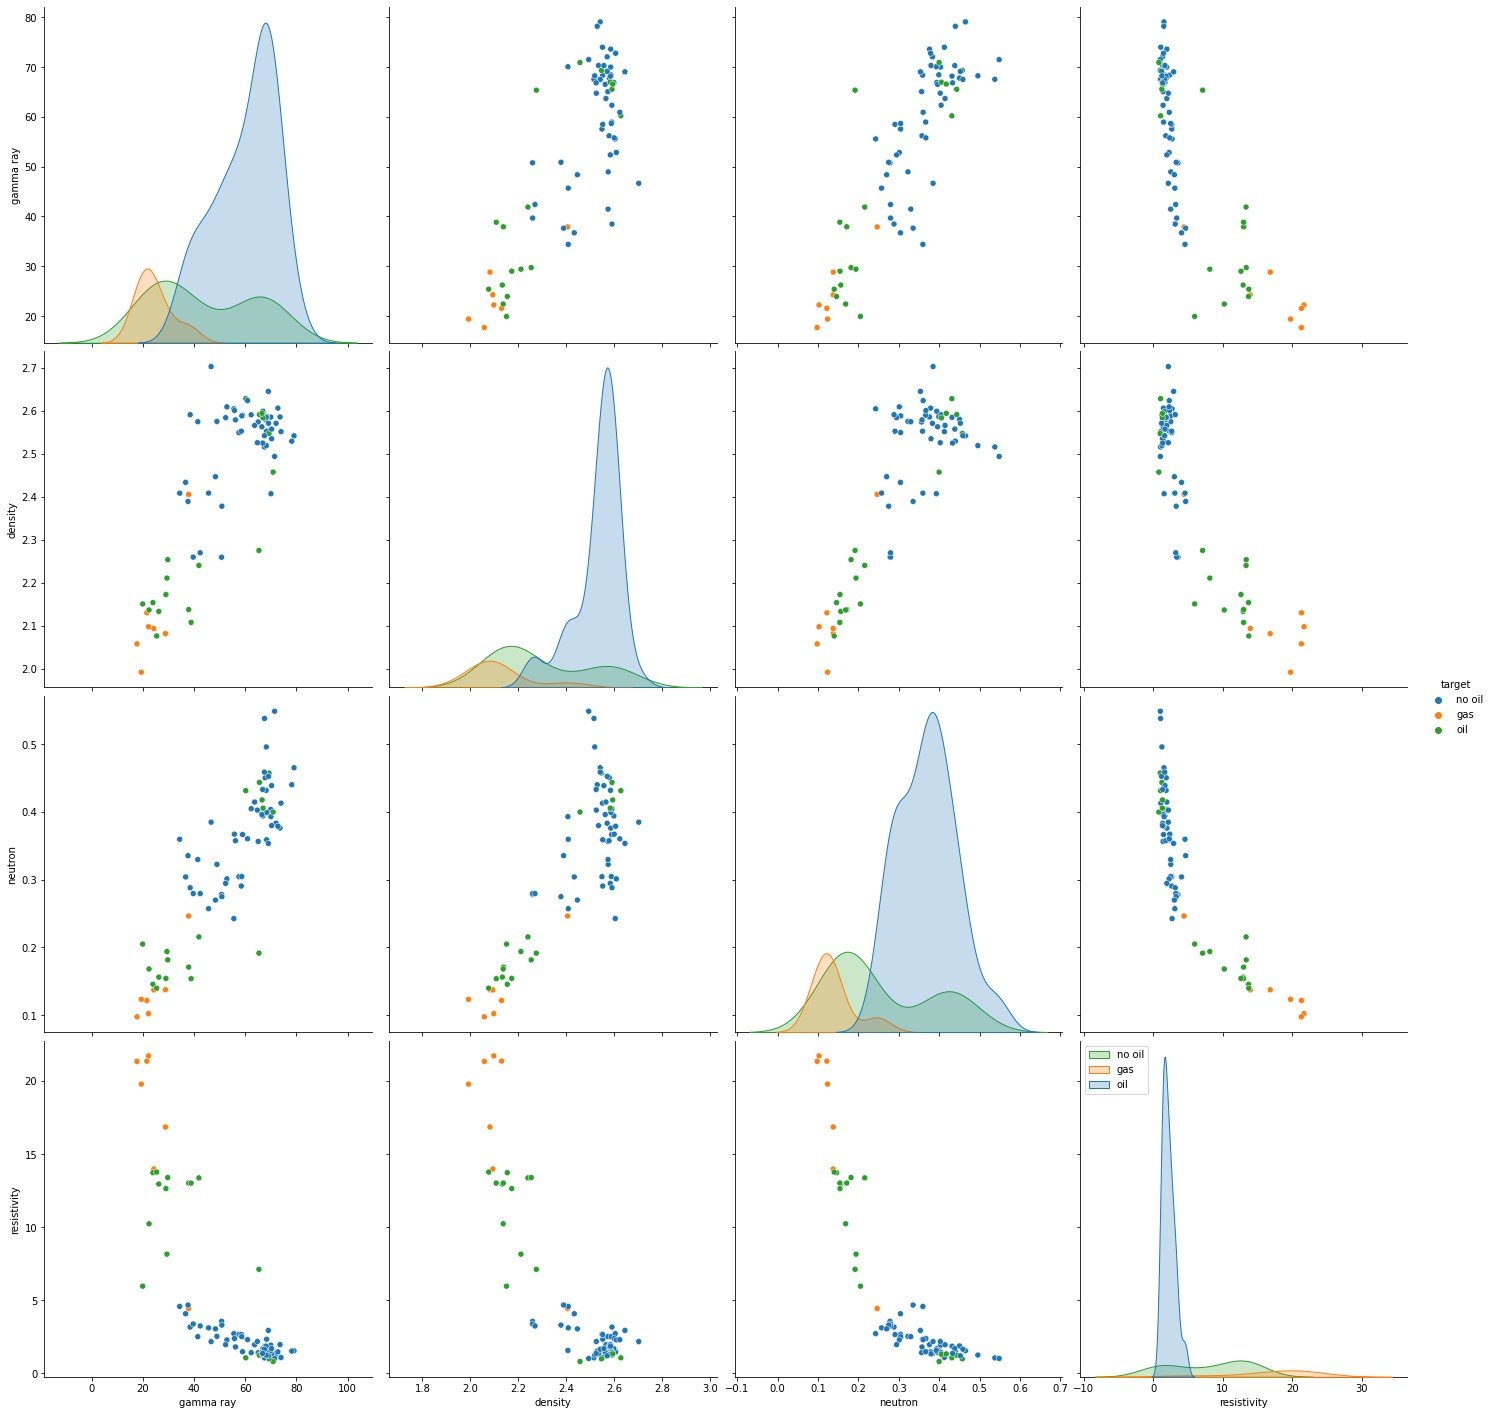

In [ ]:
sns.pairplot(ds, hue="target", size=5)
plt.legend(['no oil', 'gas','oil'], loc='upper left')

ANN Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [ ]:
df=pd.read_csv("/content/gas_oil_output.csv")
df.head()

,no oil,gas,oil
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
x=ds.loc[:, ds.columns != "target"]
y=df.loc[:, ["no oil","gas","oil"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 108)

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=4, kernel_initializer="normal", activation="relu" ))
model.add(Dense(4, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 3)                 15        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="BinaryCrossentropy", optimizer="adam")
result=model.fit(x_train, y_train, epochs=500, verbose= 1, batch_size = 5, validation_split=0.1)

Epoch 1/500
12/12 [==============================] - 1s 17ms/step - loss: 0.7352 - val_loss: 0.7367
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6879 - val_loss: 0.6884
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6657 - val_loss: 0.6682
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6578 - val_loss: 0.6603
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6528 - val_loss: 0.6549
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6485 - val_loss: 0.6495
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6439 - val_loss: 0.6447
Epoch 8/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6396 - val_loss: 0.6396
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6353 - val_loss: 0.6348
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6311 - val_loss: 0.6295
Epoch 11

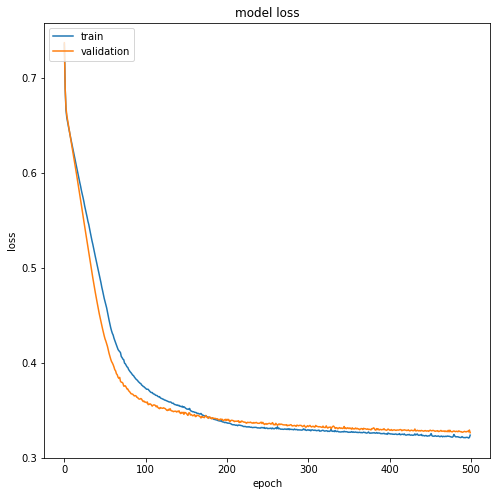

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 66ms/step


In [ ]:
print(y_pred)

[[2.15566062e-04 5.32900870e-01 4.66883600e-01]
 [9.74528670e-01 1.80183299e-04 2.52910815e-02]
 [9.78926599e-01 1.20293174e-04 2.09531207e-02]
 [9.24486637e-01 1.84474781e-03 7.36685544e-02]
 [1.33715116e-03 4.33732629e-01 5.64930141e-01]
 [9.67445433e-01 3.04170186e-04 3.22503150e-02]
 [9.76414025e-01 1.52934983e-04 2.34330967e-02]
 [9.76284564e-01 1.54729307e-04 2.35607177e-02]]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
for i in range(len(y_pred)):
  for j in range(3):
    mx = max(y_pred[i])
    if y_pred[i][j]==mx:
      y_pred[i][j]=1
    else:
      y_pred[i][j]=0
y_pred

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
classification_report(y_test, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       0.00      0.00      0.00         0\n           2       1.00      0.50      0.67         2\n\n   micro avg       0.88      0.88      0.88         8\n   macro avg       0.67      0.50      0.56         8\nweighted avg       1.00      0.88      0.92         8\n samples avg       0.88      0.88      0.88         8\n'

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.875


Decision Tree

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt_model=DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, max_features="sqrt")
mse_dt=cross_val_score(dt_model,x_train,y_train,scoring="neg_mean_squared_error",cv=20)
mean_mse_dt=np.mean(mse_dt)
print(mse_dt,mean_mse_dt)
dt_model.fit(x_train,y_train)

[-0.16666667 -0.33333333 -0.16666667 -0.         -0.         -0.
 -0.         -0.         -0.         -0.22222222 -0.44444444 -0.
 -0.         -0.22222222 -0.         -0.         -0.         -0.22222222
 -0.22222222 -0.        ] -0.1


DecisionTreeClassifier(max_features='sqrt')

In [ ]:
y_pred_dt=dt_model.predict(x_test)
print(y_pred_dt)
print(y_test)

[[0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]]
    no oil  gas  oil
40       0    0    1
10       1    0    0
2        1    0    0
69       1    0    0
43       0    0    1
67       1    0    0
63       1    0    0
57       1    0    0


In [ ]:
dt_score=dt_model.score(x_test,y_test)
print(dt_score)

0.875


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(x_test) 
print(y_test)
print(y_pred)

    no oil  gas  oil
40       0    0    1
10       1    0    0
2        1    0    0
69       1    0    0
43       0    0    1
67       1    0    0
63       1    0    0
57       1    0    0
[[0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Naive Bayes

In [ ]:
y = y.to_numpy()

In [ ]:
z = []
for i in range(len(y)):
  if y[i][0]==1:
    z.append(1)
  elif y[i][1]==1:
    z.append(2)
  else:
    z.append(3)

In [ ]:
y = pd.DataFrame(z)
x_gnb = x
y_gnb = y
x_gnb_train, x_gnb_test, y_gnb_train, y_gnb_test = train_test_split(x_gnb,y_gnb, test_size = 0.2, random_state =42 )

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_gnb_train,y_gnb_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_gnb_pred = gnb.predict(x_gnb_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_gnb_test, y_gnb_pred))

Accuracy: 0.8
